# Imports

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [136]:
"""
    Detection type
        0: Bluetooth classic
        1: Bluetooth low energy
        2: Wifi
    
    RSSI: Signal strength
    
    Detection timestamp: Unix standard
"""

data_t1 = pd.read_csv('Data/Durant_2_Durant_street__2018-01-17_14_19_48[1]_t1.csv', 
                  skiprows=[0, 1, 2, 3, 4])
data_t2 = pd.read_csv('Data/durant_bis_durant_2018-01-17_14_20_17[1]_t2.csv', 
                  skiprows=[0, 1, 2, 3, 4])
data.columns

Index(['MAC', ' Detection Type', ' RSSI', ' Detection Time'], dtype='object')

# Identify pedestrians and home wifi

In [55]:
print("{} unique MAC addresses out of {}".format(len(data_t1.MAC.unique()), len(data_t1.MAC)))

114 unique MAC addresses out of 1499


In [56]:
print("{} unique MAC addresses out of {}".format(len(data_t2.MAC.unique()), len(data_t2.MAC)))

121 unique MAC addresses out of 1433


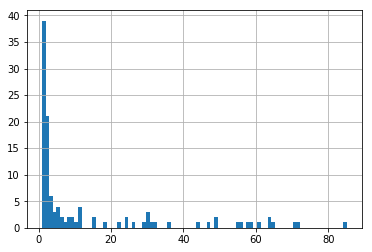

In [96]:
max_nb_detections = data_t1.groupby('MAC')[' Detection Time'].count().max()

data_t1.groupby('MAC')[' Detection Time'].count().hist(bins=max_nb_detections)

In [58]:
df = data_t1.groupby('MAC')[' Detection Time'].count()
detected_multiple_times = df[df == 15].index[0]
detected_times = list(data_t1[data_t1.MAC == detected_multiple_times][' Detection Time'])

for i in range(len(detected_times) - 1):
    print(detected_times[i + 1] - detected_times[i])

31
33
13
8
27
14
7
5
6
7
53
17
38
7


# Join the two files

In [65]:
MAC_intersection = [x for x in set(data_t1['MAC']) if x in set(data_t2['MAC'])]
len(MAC_intersection)

46

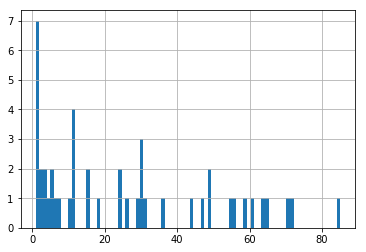

In [97]:
df = data_t1[data_t1.MAC.isin(MAC_intersection)]

max_nb_detections = df.groupby('MAC')[' Detection Time'].count().max()

df.groupby('MAC')[' Detection Time'].count().hist(bins=max_nb_detections)

In [100]:
first_detection_t1 = data_t1[data_t1.MAC.isin(MAC_intersection)][['MAC', ' Detection Time']]
first_detection_t1 = first_detection_t1.groupby('MAC').min()

first_detection_t2 = data_t2[data_t2.MAC.isin(MAC_intersection)][['MAC', ' Detection Time']]
first_detection_t2 = first_detection_t2.groupby('MAC').min()

In [101]:
first_detections = first_detection_t1.join(first_detection_t2, lsuffix='_t1', rsuffix='_t2')
first_detections['travel_time'] = first_detections[' Detection Time_t2'] - first_detections[' Detection Time_t1']
first_detections

,Detection Time_t1,Detection Time_t2,travel_time
MAC,,,
10f1f2874fff,1516227844,1516227867,23
2c3033f18d5e,1516227591,1516227623,32
30e17145fb7f,1516227856,1516227618,-238
382dd15b7fc9,1516227801,1516227883,82
448e6fb6e9c1,1516227780,1516227803,23
49c573b3dc27,1516227622,1516227649,27
506a03afa352,1516227588,1516227654,66
54bef7a7a112,1516227732,1516227741,9
55985b78600e,1516227625,1516227734,109


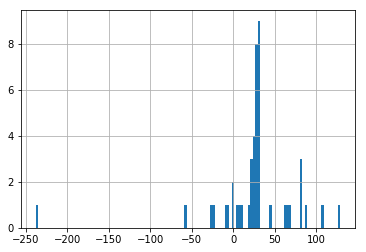

In [99]:
first_detections['travel_time'].hist(bins=first_detections['travel_time'].max())

Interpretation:
- Negative values are pedestrians walking against the car flow
    - Outlier at -250: one person who probably stopped on her way
- Values at 0 are home wifis detected by both tablets (probably too close to each other)
- Most cars must take around 20s to go from one tablet to the other (peak)
- Values very close to 0 are surprising, especially the negative ones (signals going very fast against the car flow. Are they bikes? Noise?) 

# Speeds

On Tuesday the two tablets were 28 meters from each other

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


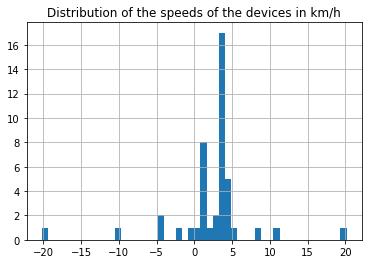

In [110]:
speeds = first_detections[first_detections['travel_time'] != 0]

speeds['speed'] = 28 / speeds['travel_time']

# Convert to km/h
speeds['speed'] *= 3600 / 1000

plt.title('Distribution of the speeds of the devices in km/h')
speeds['speed'].hist(bins=50)

# Signals detected by only one device

In [129]:
detection_t1_only = data_t1[~data_t1.MAC.isin(MAC_intersection)]
detection_t1_only_unique = detection_t1_only[['MAC', ' Detection Time']].groupby('MAC').count()

detection_t2_only = data_t2[~data_t2.MAC.isin(MAC_intersection)]
detection_t2_only_unique = detection_t2_only[['MAC', ' Detection Time']].groupby('MAC').count()

In [120]:
print("{} signals were detected by the first tablet only out of {}".format(
    len(detection_t1_only.MAC.unique()), len(data_t1.MAC.unique())))
print("{} signals were detected by the second tablet only out of {}".format(
    len(detection_t2_only.MAC.unique()), len(data_t2.MAC.unique())))

68 signals were detected by the first tablet only out of 114
75 signals were detected by the second tablet only out of 121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1a2ba8>]], dtype=object)

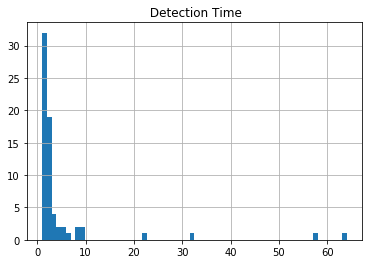

In [135]:
detection_t1_only_unique.hist(bins=detection_t1_only_unique[' Detection Time'].max())